<h1> EDA Assignment 3</h1>

<p style='font-size:115%;'>
We are provided with two datasets : <br>
1. A list of facemasks on online retailer iHerb with data around the product and its price, number of ratings <br>
2. A list of consumer reviews of these face masks <br>
<br>
Questions to answer:<br>
1. Which are the most popular face masks out there? <br>
2. What do consumers like about them? Why? <br>
3. What different profiles of consumers buy masks? <br>
</p> 

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry
from wordcloud import WordCloud, STOPWORDS

<h4> Lets start with exploratory analysis of the data first </h4>

Reviews

In [2]:
reviews = pd.read_excel('reviews.xlsx')
reviews.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1614071051,en-US,NaN,NaN
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,50,Ð’Ð½ÑƒÐºÑƒ Ð¾Ñ‡ÐµÐ½ÑŒ Ð¿Ð¾Ð½Ñ€Ð°Ð²Ð¸Ð»Ð¾ÑÑŒ. ...,ÐŸÑ€ÐµÐºÑ€Ð°ÑÐ½Ð¾!,False,1612659399,ru-RU,The grandson really liked it. Comfortable mask.,en-US
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,40,Easy to put on & comfortable to wear.,Good,False,1612647603,en-US,NaN,NaN
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,40,"Ð¢Ð¾Ð½ÐºÐ°Ñ, Ð¿Ñ€Ð¸ÑÑ‚Ð½Ð°Ñ Ðº Ñ‚ÐµÐ»Ñƒ Ð¼Ð...",Ð¥Ð¾Ñ€Ð¾ÑˆÐ¾,False,1612542569,ru-RU,A thin mask that is pleasant to the body. I li...,en-US
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,50,ÐžÑ‚Ð»Ð¸Ñ‡Ð½Ð°Ñ Ð¼Ð°ÑÐºÐ°! ÐœÐ½Ðµ Ð¿Ð¾Ð´Ð¾Ñˆ...,ÐŸÑ€ÐµÐºÑ€Ð°ÑÐ½Ð¾!,False,1612518222,ru-RU,Great mask! It suited me perfectly. There is a...,en-US


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   abuseCount                          3849 non-null   int64  
 1   customerNickname                    3849 non-null   object 
 2   helpfulNo                           3849 non-null   int64  
 3   helpfulYes                          3849 non-null   int64  
 4   id                                  3849 non-null   object 
 5   imagesCount                         3849 non-null   int64  
 6   languageCode                        3849 non-null   object 
 7   postedDate                          3849 non-null   object 
 8   productId                           3849 non-null   int64  
 9   profileInfo.ugcSummary.answerCount  3843 non-null   float64
 10  profileInfo.ugcSummary.reviewCount  3843 non-null   float64
 11  ratingValue                         3849 no

Products

In [4]:
products = pd.read_excel('products.xlsx')
products.head()

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
1,101774,"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
2,101955,"SunJoy, KN95, Professional Protective Disposab...",8.86,AUD,http://schema.org/InStock,https://au.iherb.com/pr/SunJoy-KN95-Profession...,https://au.iherb.com/c/protective-face-masks
3,103838,"Lozperi, Copper Mask, Adult, Black, 1 Mask",6.85,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...,https://au.iherb.com/c/protective-face-masks
4,102734,"Zidian, Disposable Protective Mask, 50 Pack",15.35,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Zidian-Disposable-Prot...,https://au.iherb.com/c/protective-face-masks


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            27 non-null     int64  
 1   product_name          27 non-null     object 
 2   product_price         27 non-null     float64
 3   price_currency        27 non-null     object 
 4   product_availability  27 non-null     object 
 5   product_url           27 non-null     object 
 6   source_url            27 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ KB


<h3> Visualisation and Analysis </h3>

In [6]:
products['product_id'].nunique(), reviews['productId'].nunique()

(27, 27)

Product IDs seem to be common and can the 2 tables be combined using an outer joing over the reviews table

In [7]:
products['productId'] = products['product_id']
products.drop('product_id', axis=1, inplace=True)
combined_prod_id = reviews.merge(products[['productId','product_name','product_price']], on='productId', how='left')
combined_prod_id.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,...,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle,product_name,product_price
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,...,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1614071051,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",6.85
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,...,50,Ð’Ð½ÑƒÐºÑƒ Ð¾Ñ‡ÐµÐ½ÑŒ Ð¿Ð¾Ð½Ñ€Ð°Ð²Ð¸Ð»Ð¾ÑÑŒ. ...,ÐŸÑ€ÐµÐºÑ€Ð°ÑÐ½Ð¾!,False,1612659399,ru-RU,The grandson really liked it. Comfortable mask.,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",6.85
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,...,40,Easy to put on & comfortable to wear.,Good,False,1612647603,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",6.85
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,...,40,"Ð¢Ð¾Ð½ÐºÐ°Ñ, Ð¿Ñ€Ð¸ÑÑ‚Ð½Ð°Ñ Ðº Ñ‚ÐµÐ»Ñƒ Ð¼Ð...",Ð¥Ð¾Ñ€Ð¾ÑˆÐ¾,False,1612542569,ru-RU,A thin mask that is pleasant to the body. I li...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",6.85
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,...,50,ÐžÑ‚Ð»Ð¸Ñ‡Ð½Ð°Ñ Ð¼Ð°ÑÐºÐ°! ÐœÐ½Ðµ Ð¿Ð¾Ð´Ð¾Ñˆ...,ÐŸÑ€ÐµÐºÑ€Ð°ÑÐ½Ð¾!,False,1612518222,ru-RU,Great mask! It suited me perfectly. There is a...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",6.85


<h3>Q1. What are the most popular facemasks?</h3>

By Raw Ratings

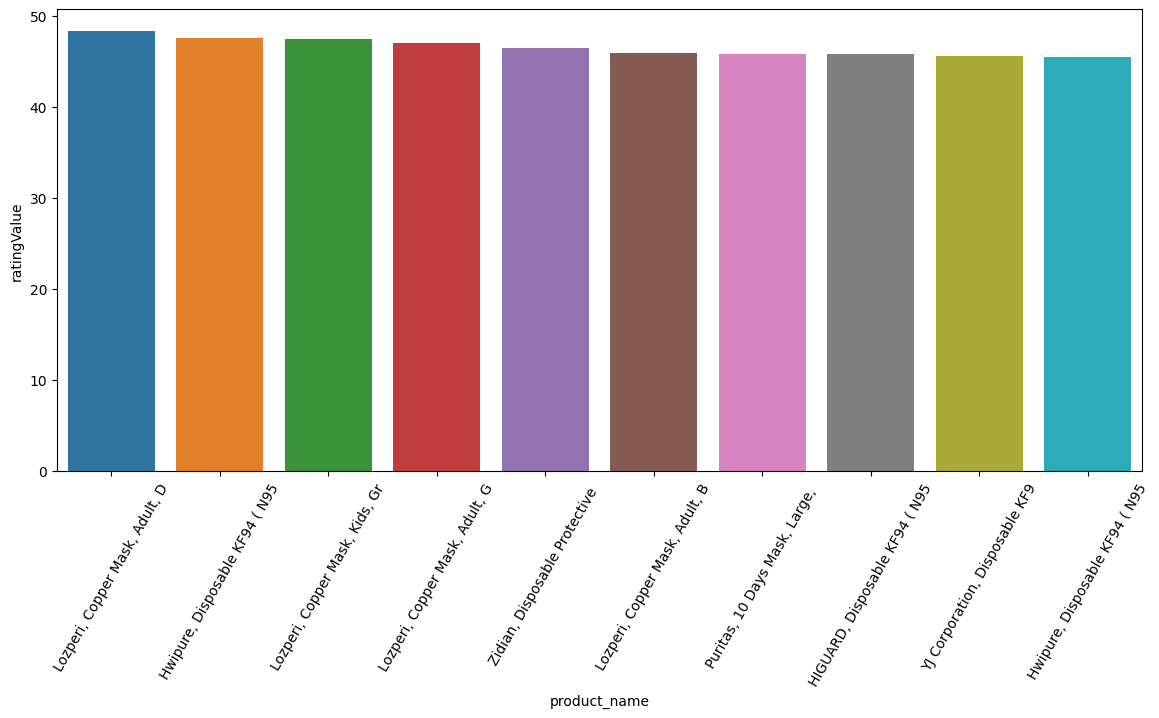

In [8]:
product_ratings_avg = combined_prod_id[['product_name','ratingValue']].groupby(['product_name']).mean().sort_values(by='ratingValue', ascending=False)
plt.figure(figsize=(14,6))
ax = sns.barplot(y=product_ratings_avg.head(10)['ratingValue'], x=product_ratings_avg.index[:10])
ax.set_xticklabels(product_ratings_avg.index[:10].map(lambda x:x[:30]), rotation=60)
pass

Lozperi Copper Mask seems to be the highest rated but this is not sufficient information. We also need to look at the sales numbers as well as different categories.

Sales numbers for each product

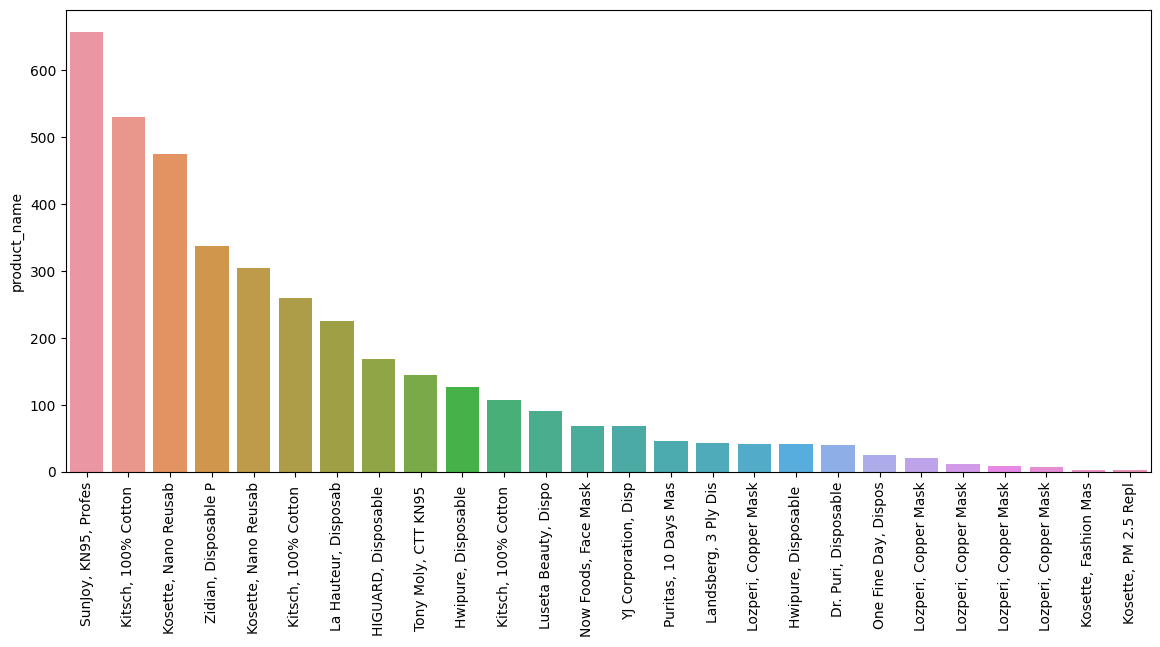

In [9]:
plt.figure(figsize=(14,6))
ax = sns.barplot(y=combined_prod_id['product_name'].value_counts(), x= combined_prod_id['product_name'].value_counts().index)
ax.set_xticklabels(pd.Series(combined_prod_id['product_name'].value_counts().index).map(lambda x:x[:20]), rotation=90)
pass

Ratings for products with more than 100 units sold

In [10]:
product_counts = combined_prod_id[['product_name','ratingValue']].groupby(by='product_name').count()
product_ratings_avg_100_plus = product_counts.merge(product_ratings_avg, on='product_name')
product_ratings_avg_100_plus.rename({'ratingValue_x':'unitCount', 'ratingValue_y':'avgRatings'}, inplace=True, axis=1)
product_ratings_avg_100_plus = product_ratings_avg_100_plus[product_ratings_avg_100_plus['unitCount'] > 100].sort_values(by='avgRatings', ascending=False)
product_ratings_avg_100_plus.head()

,unitCount,avgRatings
product_name,,
"Zidian, Disposable Protective Mask, 50 Pack",337,46.498516
"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 Mask",168,45.833333
"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 Mask",126,45.555556
"La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 Mask",225,45.511111
"Kosette, Nano Reusable Face Protection Mask, Large, 1 Mask",304,45.361842


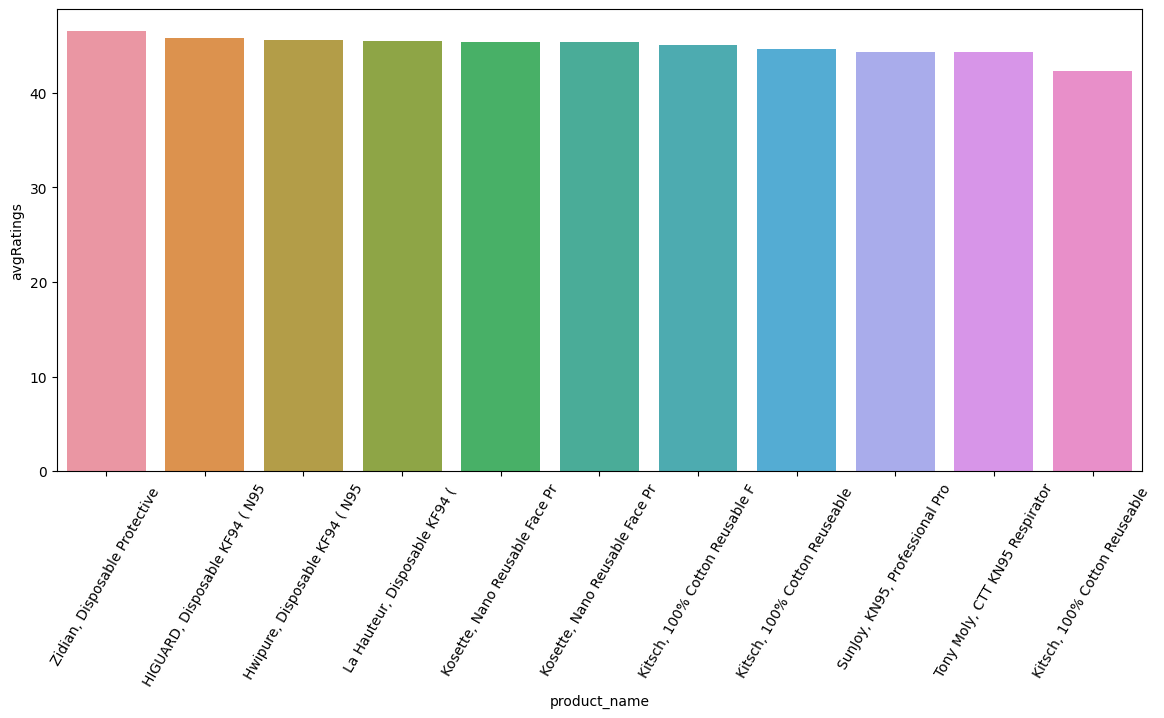

In [11]:
plt.figure(figsize=(14,6))
ax = sns.barplot(y=product_ratings_avg_100_plus['avgRatings'], x=product_ratings_avg_100_plus.index)
ax.set_xticklabels(product_ratings_avg_100_plus.index.map(lambda x:x[:30]), rotation=60)
pass

Zidian Disposable mask appears to be the highest rated with more than 100 units sold. Brands like <b><i>Zidian, Kossette, Kitsch and Sunjoy </i></b> are popular among people.

Let's segregate the data <b><i>brandwise</i></b> and using <b><i>mask type</i></b> and look at popularity from that aspect.

In [12]:
combined_prod_id['BrandName'] = combined_prod_id['product_name'].apply(lambda x:x.split(',')[0])
combined_prod_id['BrandName']

0             Lozperi
1             Lozperi
2             Lozperi
3             Lozperi
4             Lozperi
            ...      
3844    Luseta Beauty
3845    Luseta Beauty
3846    Luseta Beauty
3847    Luseta Beauty
3848    Luseta Beauty
Name: BrandName, Length: 3849, dtype: object

In [13]:
def getCategory(name):
    if 'Reus' in name or 'reus' in name:
        return 'Reuseable'
    elif 'Dispos' in name or 'Dispos' in name:
        return 'Disposable'
    else:
        return 'Other'
combined_prod_id['Category'] = combined_prod_id['product_name'].apply(getCategory)
combined_prod_id['Category'].head()

0    Other
1    Other
2    Other
3    Other
4    Other
Name: Category, dtype: object

<AxesSubplot:xlabel='Category', ylabel='count'>

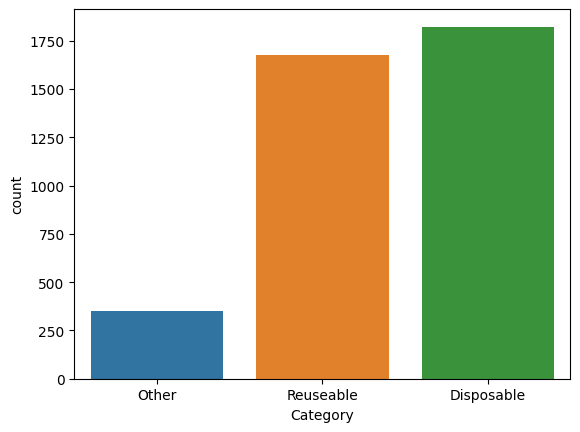

In [14]:
sns.countplot(data=combined_prod_id, x='Category')

<b><i>Disposable</i></b> masks are to be the most popular followed by <b><i>reuseable</i></b> masks.

Let's look at the most popular brands categorywise.

In [15]:
category_group = combined_prod_id.groupby('Category')['product_name'].value_counts()

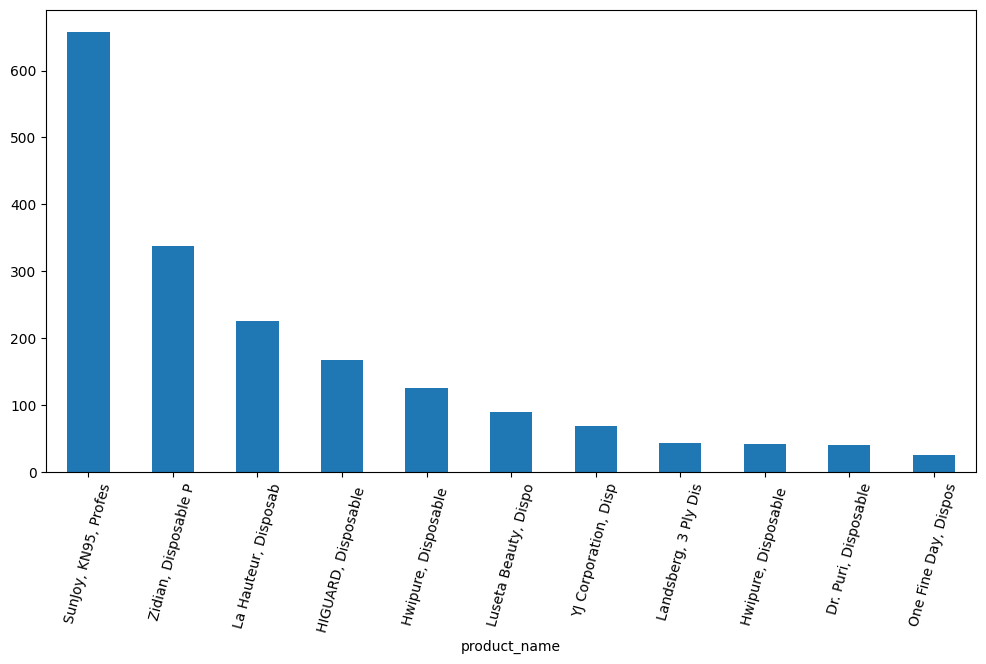

In [16]:
plt.figure(figsize=(12,6))
ax = category_group['Disposable'].plot(kind='bar')
ax.set_xticklabels(pd.Series(category_group['Disposable'].index).map(lambda x:x[:20]), rotation=75)
pass

<b><i>Sunjoy KN95</i></b> masks are to the most popular in the <b><i>disposable</i></b> category.

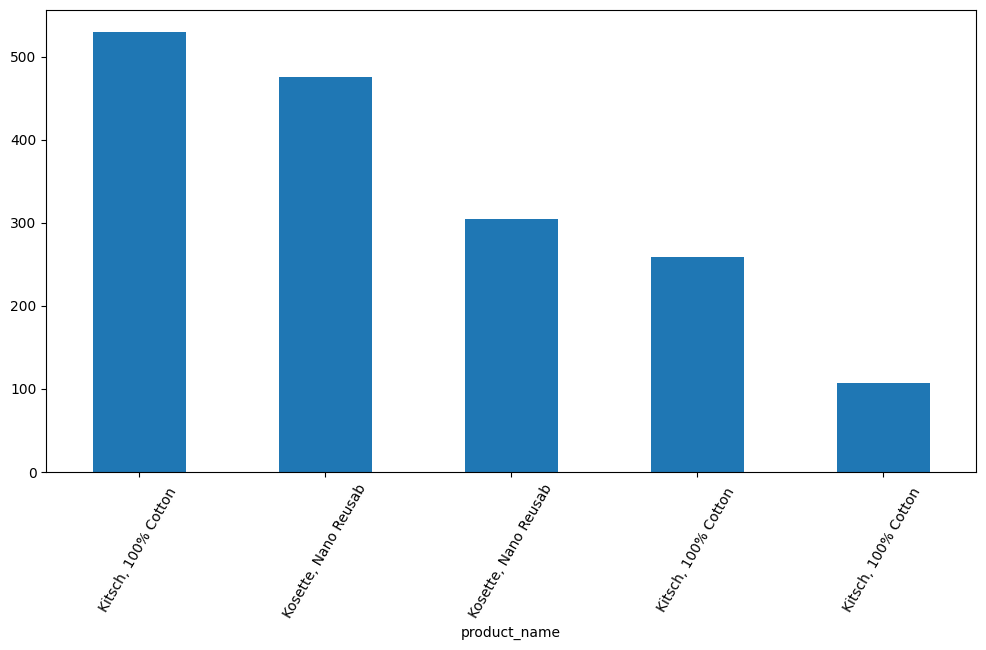

In [17]:
plt.figure(figsize=(12,6))
ax = category_group['Reuseable'].plot(kind='bar')
ax.set_xticklabels(pd.Series(category_group['Reuseable'].index).map(lambda x:x[:20]), rotation=60)
pass

<b><i>Kitsch Cotton</i></b> masks are to the most popular in the <b><i>reuseable</i></b> category.

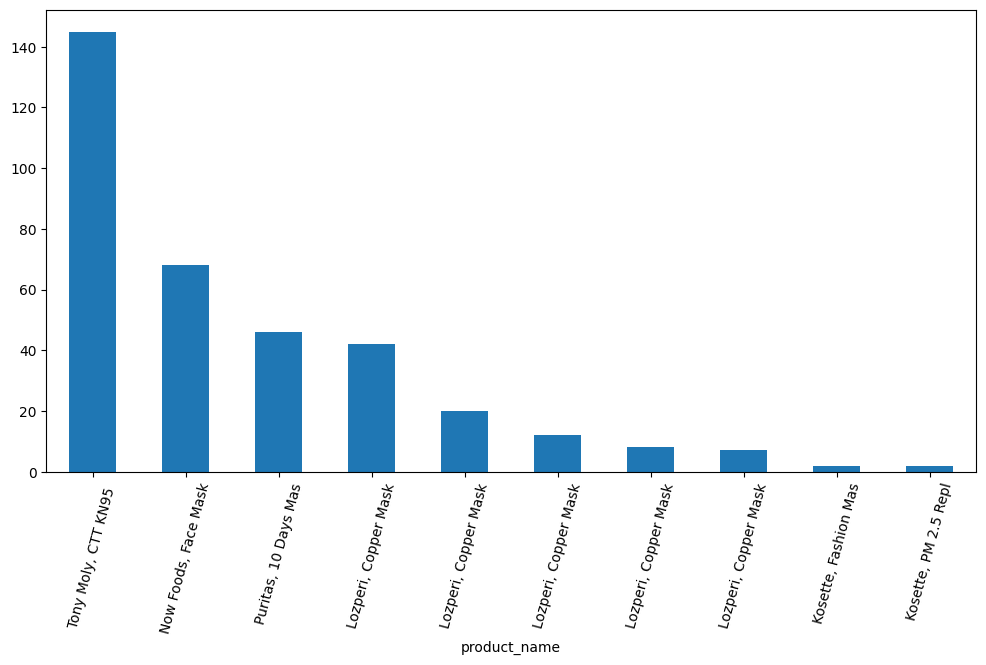

In [18]:
plt.figure(figsize=(12,6))
ax = category_group['Other'].plot(kind='bar')
ax.set_xticklabels(pd.Series(category_group['Other'].index).map(lambda x:x[:20]), rotation=75)
pass

<b><i>Tony Moly </i></b> masks are popular in the <b><i>others</i></b> category.

<h3>Q2. What do consumers like about them? Why?</h3>

<b><i>Word cloud</i></b> is one of the most efficient and simple ways of identifying the keywords in a corpus of text. Lets generate a wordcloud for english translated reviews for each category of masks segregating only those reviews that consumers found helpful.

In [19]:
combined_prod_id[['reviewText','translation.reviewText','languageCode.1']].fillna('', inplace=True)
combined_prod_id['english_reviews'] = combined_prod_id[['reviewText','translation.reviewText','languageCode.1']].apply(lambda x:x[0] if 'en' in x[2] else x[1], axis=1)
combined_prod_id['english_reviews'].head()

C:\Users\kishl\AppData\Local\Temp\ipykernel_25612\301186810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_prod_id[['reviewText','translation.reviewText','languageCode.1']].fillna('', inplace=True)


0    The mask quality and the color is good. It fit...
1      The grandson really liked it. Comfortable mask.
2                Easy to put on & comfortable to wear.
3    A thin mask that is pleasant to the body. I li...
4    Great mask! It suited me perfectly. There is a...
Name: english_reviews, dtype: object

In [20]:
def generate_wordcloud(frame):
    comment_words = ''
    stopwords = set(STOPWORDS)
    stopwords.update(['face', 'mask','masks','ð']) # Remove unnecessary words that create noise

    # iterate through the csv file
    for val in frame['english_reviews']:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    collocation_threshold = 3,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

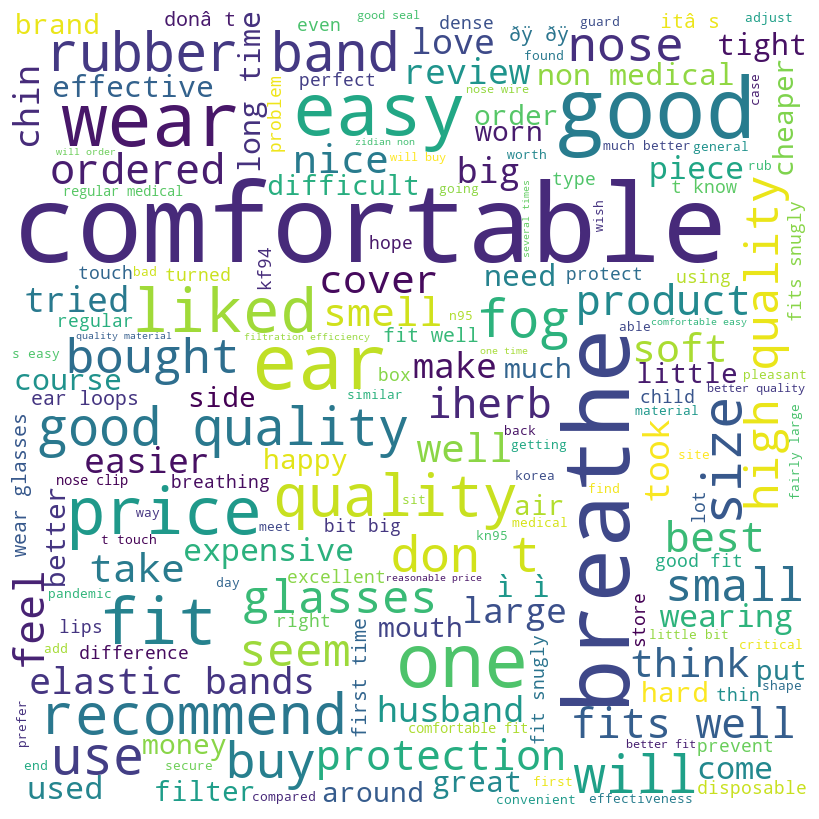

In [21]:
# Consider only those reviews which were helpful to consumers by using (combined_prod_id['helpfulYes'] > combined_prod_id['helpfulNo'])
disposables = combined_prod_id[(combined_prod_id['Category']=='Disposable')  & (combined_prod_id['helpfulYes'] > combined_prod_id['helpfulNo'])]
generate_wordcloud(disposables)

While most of the reviews seem to be praising the comfort and quality of the products, some other things that stand out in this category are <b><i> filtration efficiency, cheaper, convenient and better fit. </i></b>

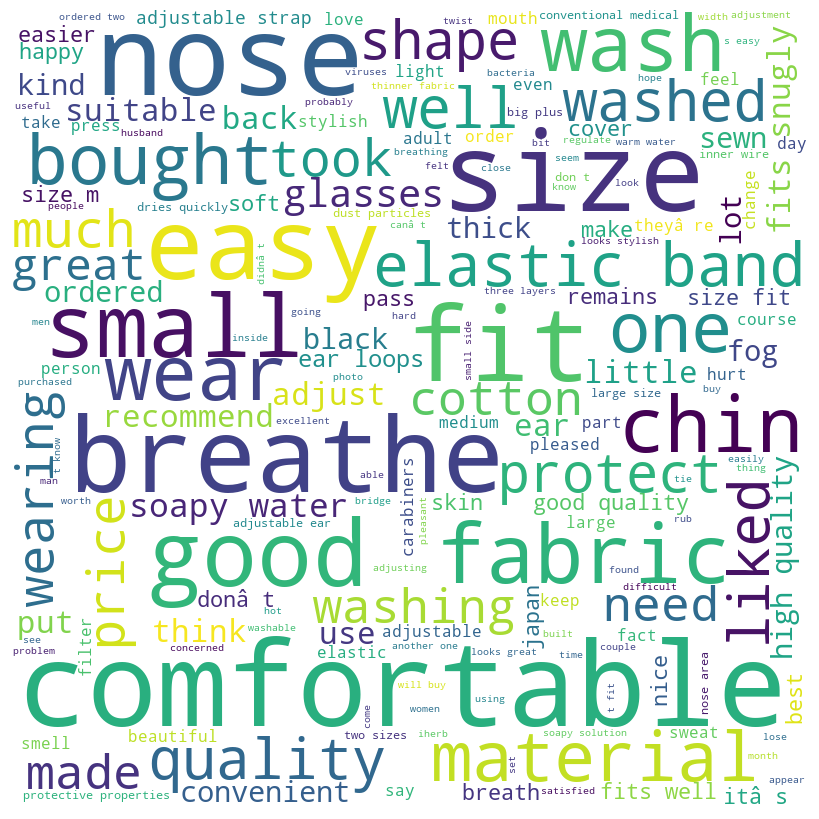

In [22]:
reuseables = combined_prod_id[(combined_prod_id['Category']=='Reuseable')  & (combined_prod_id['helpfulYes'] > combined_prod_id['helpfulNo'])]
generate_wordcloud(reuseables)

The things that stand out in the reuseables category are <b><i> looks great, fits well, washed(washable) and adjustable. </i></b>

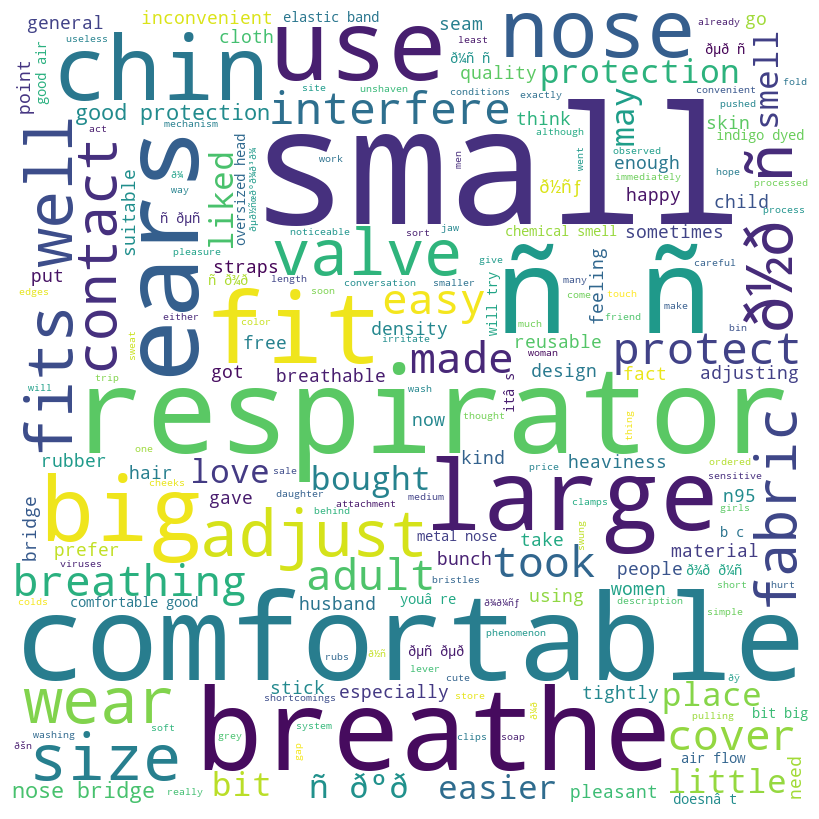

In [23]:
others = combined_prod_id[(combined_prod_id['Category']=='Other')  & (combined_prod_id['helpfulYes'] > combined_prod_id['helpfulNo'])]
generate_wordcloud(others)

Important keywords in the <b><i>Others</i></b> category are <b><i> respirator, adjustable, and valve. </i></b>

<h3>Q3. What different profiles of consumers buy masks?</h3>

<b><i>Language data</i></b> can be used to segregate users based on their country. <b><i>Plotly Choropleth maps</i></b> can be used for this visualisation.

In [24]:
combined_prod_id['alpha_3_code'] = combined_prod_id['languageCode.1'].apply(lambda x:pycountry.countries.get(alpha_2=x[-2:]).alpha_3)

In [25]:
plt.figure(figsize=(14,8))
fig = px.choropleth(locations=combined_prod_id['alpha_3_code'].value_counts().index, locationmode="ISO-3", color=combined_prod_id['alpha_3_code'].value_counts(), color_continuous_scale=px.colors.sequential.Blues)

fig.add_scattergeo(
    locations=combined_prod_id['alpha_3_code'].value_counts().index,
    locationmode="ISO-3", 
    text=pd.Series(combined_prod_id['alpha_3_code'].value_counts().index) +': '+ pd.Series(list(combined_prod_id['alpha_3_code'].value_counts().astype('str'))),
    mode='text',
    )

fig.update_layout(margin=dict(l=5, r=5, t=5, b=5))
fig.show()

<Figure size 1400x800 with 0 Axes>

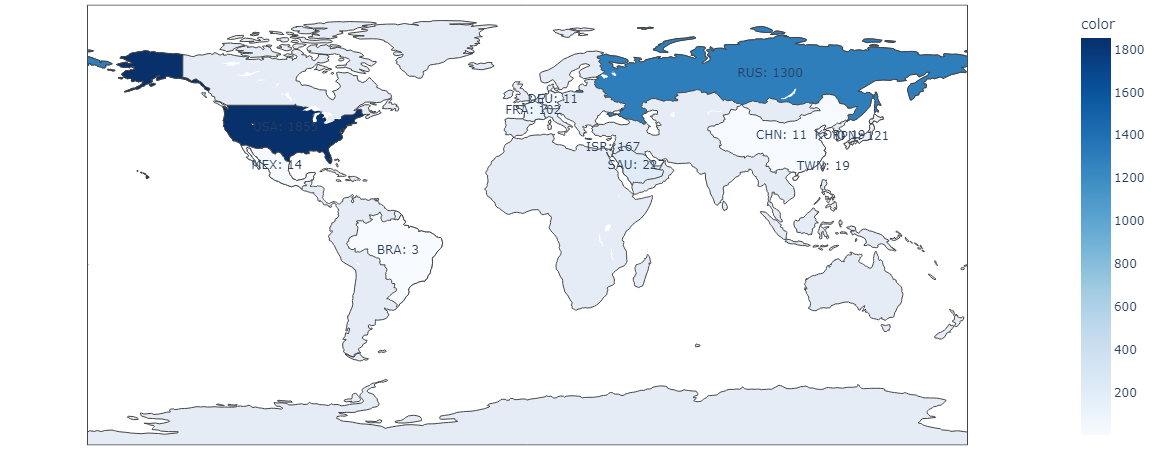

In [26]:
# Had to display it using image since plotly graph is not converted to pdf
from IPython.display import Image
Image(filename='newplot.png')

<b><i>Russia and USA </i></b>seem to be the largest buyers of facemasks according to iHerb data. However, we don't have information about highly populous countries like India and China.